In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seasons as ps
import pandas as pd

# Generate a time series

(define what you mean by time series) Here a time series is a chronological series of data point. for now there is no importance given to the timestamp at which the event happened, only the order is important.

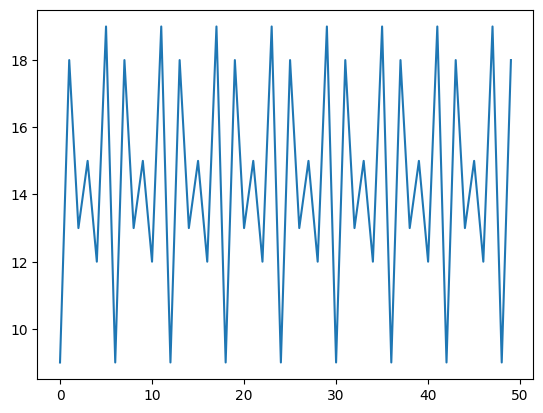

In [2]:
# Set seed
np.random.seed(0)

N = 50

y = ps.utils.generate_series(
    length=N,
    trend='linear',
    trend_coefficient=0,
    seasonality=[[4, 10], [5, 8, 9]], 
    seasonality_type='additive',
    error_distribution='normal',
    error_scale=0
)

#y = 0.1*np.sin(np.arange(N)/(np.pi**0.2)) + (np.sin(np.arange(N)/(5*np.pi))) + np.random.randn(N)

plt.plot(y)
plt.show()

# Seasonality detection

(introduce the different methods)

## Brute force

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.171e+05
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           2.71e-89
Time:                        19:18:44   Log-Likelihood:                 89.973
No. Observations:                  50   AIC:                            -171.9
Df Residuals:                      46   BIC:                            -164.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.9877      0.007   -433.773      0.0

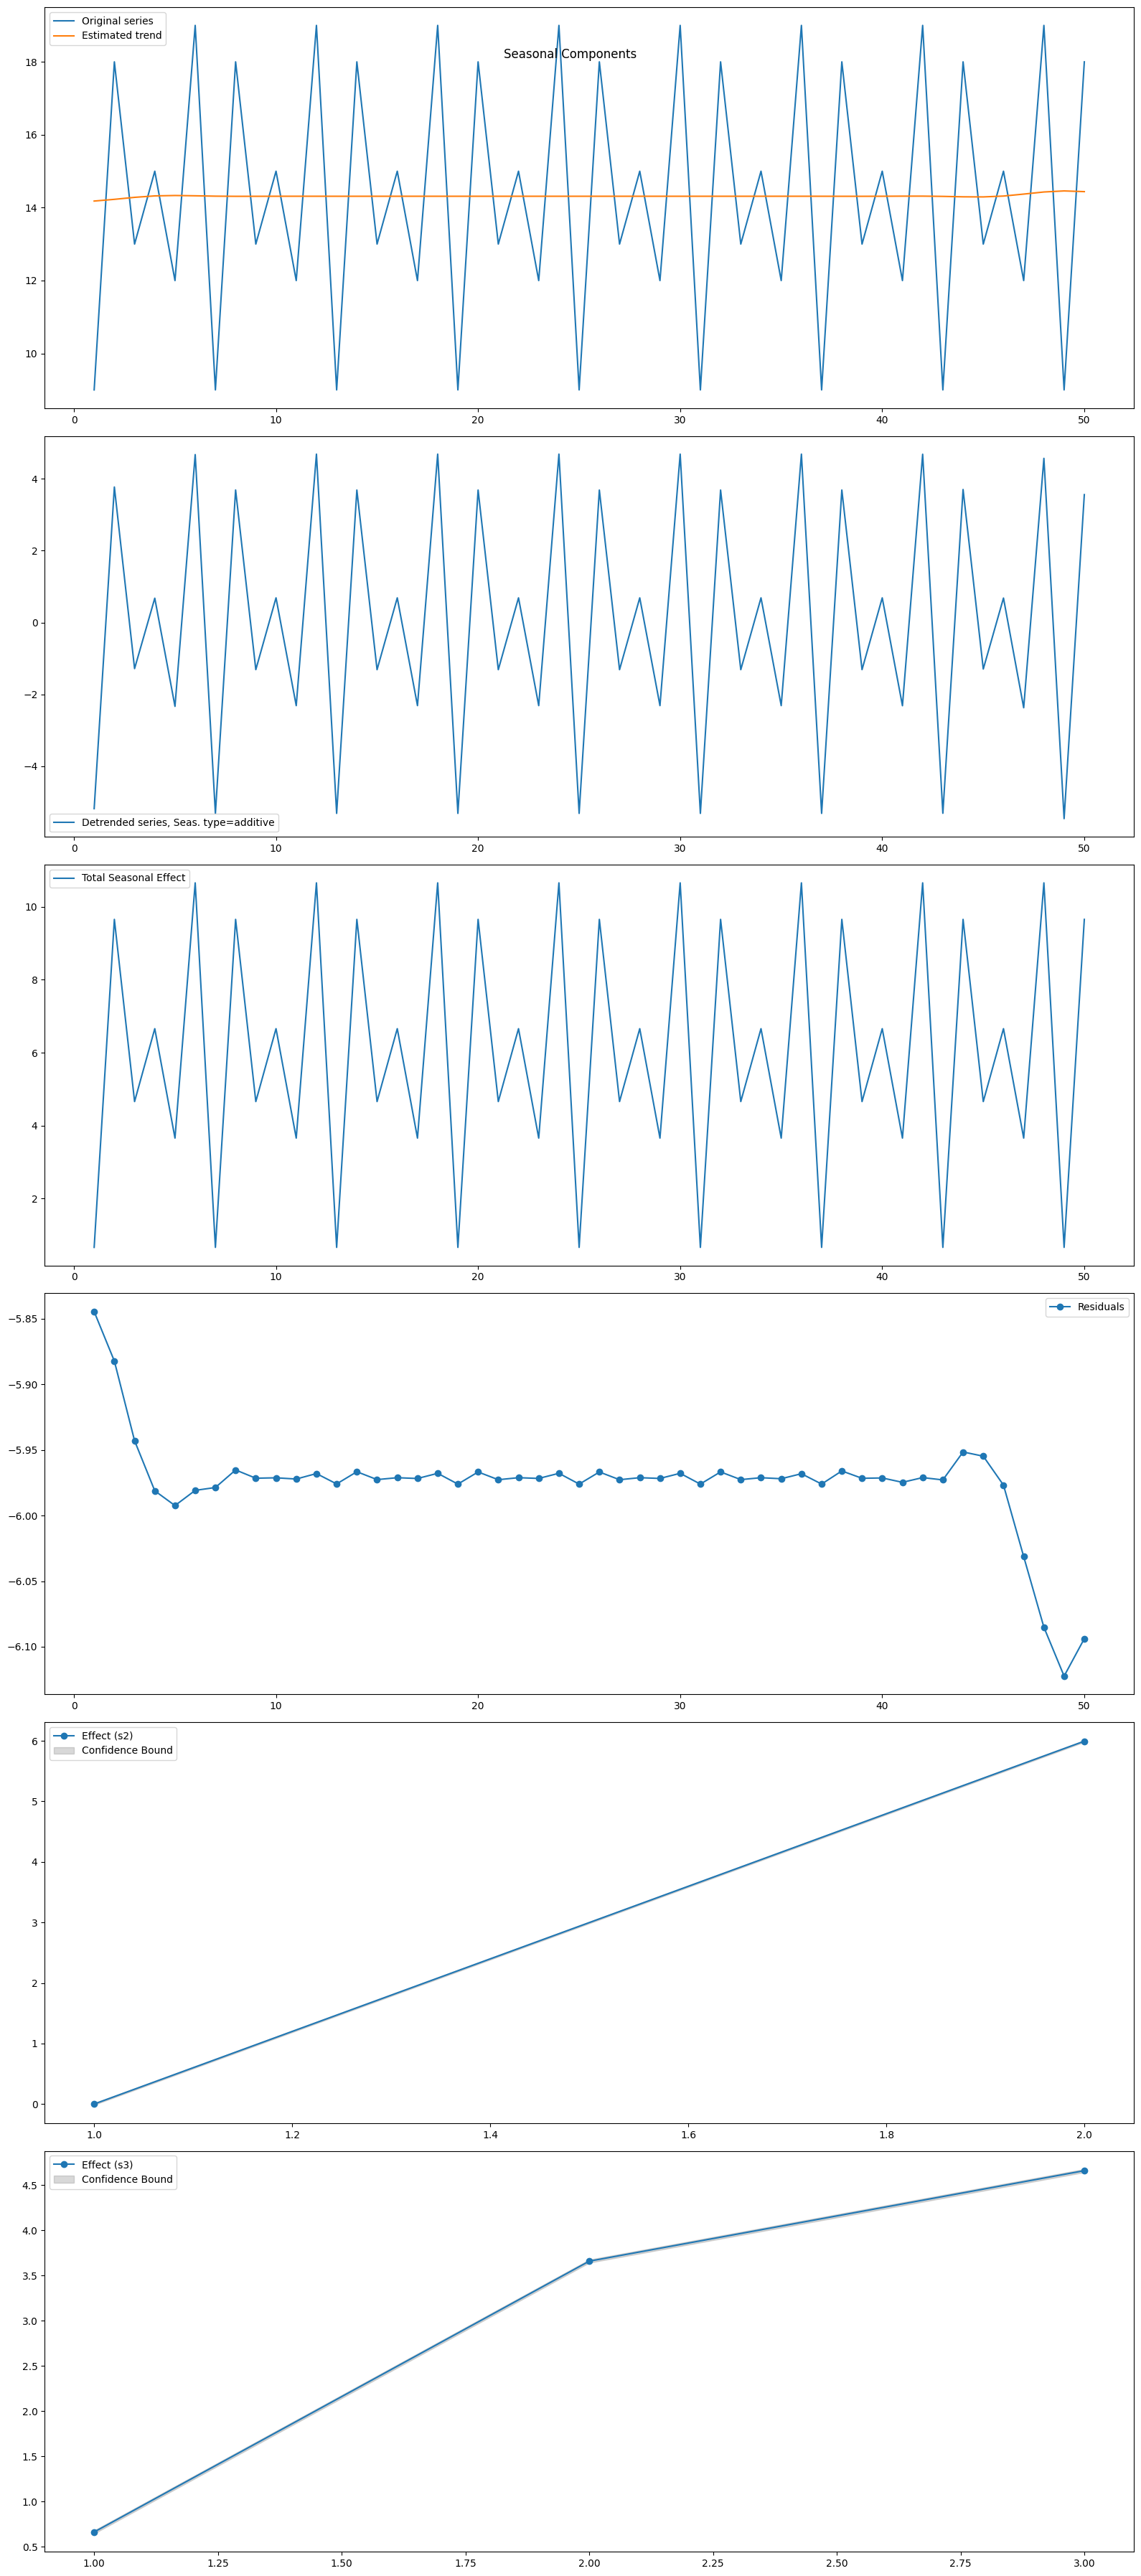

In [5]:
s, d = ps.detect.brute_force_seasonality(
    data=y,
    min_seasonality=2,
    seasonality_type='auto',
    alpha=0.05,
    display_plot=True,
    use_linear_reg=False,
    return_effects=True,
    apply_cartesian=False
)

In [4]:
d

{'s2': {'effect': [0.0, 5.995101154340974],
  'confidence_interval': [[-0.013864407919029098, 0.013864407919029098],
   [5.981236746421944, 6.008965562260002]]},
 's3': {'effect': [0.6635024750628209, 3.6591726546007135, 4.660161320741838],
  'confidence_interval': [[0.6461747179376829, 0.6808302321879589],
   [3.6418448974755755, 3.6765004117258515],
   [4.642404055189613, 4.677918586294064]]}}

In [28]:
from sklearn.linear_model import LinearRegression


In [30]:
def _generate_design_matrix(N, seasonal_periods):
    K = len(seasonal_periods)
    num_seasonal_effects = sum(seasonal_periods)
    A = np.zeros((N, num_seasonal_effects))
    
    effect_index = 0
    for k, xk in enumerate(seasonal_periods):
        for i in range(xk):
            for t in range(N):
                if t % xk == i:
                    A[t, effect_index + i] = 1
        effect_index += xk
    
    return A

In [28]:
import pandas as pd

In [31]:
X = _generate_design_matrix(len(y), [2])

In [32]:
X_df = pd.DataFrame(X)
X_df.to_clipboard(index=False)

In [33]:
y_df = pd.DataFrame(y)
y_df.to_clipboard(index=False)

In [10]:
model = LinearRegression()
model = model.fit(X, y)